In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

# Data descripton

In [41]:
heart = pd.read_csv('heart_2020_cleaned.csv')

In [42]:
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [43]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

***Questions and possible answers***

**HeartDisease** - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) - **'No', 'Yes'**

**BMI** - Body Mass Index (BMI) - **BMI value**

**Smoking** - Have you smoked at least 100 cigarettes in your entire life - **'Yes', 'No'**

**AlcoholDrinking** - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week - **'Yes', 'No'**

**Stroke** - (Ever told) (you had) a stroke? - **'No', 'Yes'**

**PhysicalHealth** - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days) -  **Integer number 1 - 30**


**MentalHealth** - Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days) -  **Integer number 1 - 30**

**DiffWalking** - Do you have serious difficulty walking or climbing stairs? - **'No', 'Yes'**

**Sex** - Are you male or female? - **'Female', 'Male'**

**AgeCategory** - Fourteen-level age category - 
**'55-59', '80 or older', '65-69', '75-79', '40-44', '70-74', '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'**

**Race** - Imputed race/ethnicity value - **'White', 'Black', 'Asian', 'American Indian/Alaskan Native', Other', 'Hispanic'**

**Diabetic** - (Ever told) (you had) diabetes? **'Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'**

**PhysicalActivity** - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job - **'No', 'Yes'**

**GenHealth** - Would you say that in general your health is... - **'Very good', 'Fair', 'Good', 'Poor', 'Excellent'**

**SleepTime** - On average, how many hours of sleep do you get in a 24-hour period? -  **Integer number**

**Asthma** - (Ever told) (you had) asthma?  - **'No', 'Yes'**

**KidneyDisease** - Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease? - **'No', 'Yes'**

**SkinCancer** - (Ever told) (you had) skin cancer? - **'No', 'Yes'**

# Data visualisation

In [44]:
heart.groupby('HeartDisease').count()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,,,,,,,,,,,,,,,,,
No,292422,292422,292422,292422,292422,292422,292422,292422,292422,292422,292422,292422,292422,292422,292422,292422,292422
Yes,27373,27373,27373,27373,27373,27373,27373,27373,27373,27373,27373,27373,27373,27373,27373,27373,27373


**Distribution of people by BMI**

In [45]:
heart['BMI'] = heart.BMI.round(0)
heart.PhysicalHealth = heart.PhysicalHealth.round(0)
heart.MentalHealth = heart.MentalHealth.round(0)
heart['HeartDiseaseNum'] =  heart.HeartDisease.map({"Yes" : 1, "No" : 0})

In [46]:
heart_disease = heart.where(heart.HeartDisease == 'Yes').groupby('BMI')[['HeartDisease']].count()/27373
heart_nodisease = heart.where(heart.HeartDisease == 'No').groupby('BMI')[['HeartDisease']].count()/292422
heart_all = heart.groupby('BMI')[['HeartDisease']].count()/319795

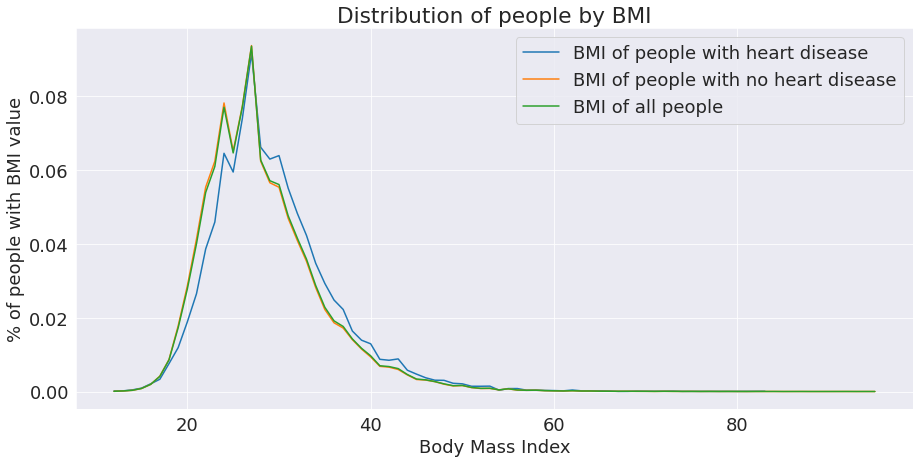

In [47]:
plt.figure(figsize=(15, 7))
plt.rcParams.update({'font.size': 18})
plt.title('Distribution of people by BMI')
plt.plot(heart_disease.index, heart_disease.HeartDisease)
plt.plot(heart_nodisease.index, heart_nodisease.HeartDisease)
plt.plot(heart_all.index, heart_all.HeartDisease)
plt.xlabel('Body Mass Index')
plt.ylabel('% of people with BMI value')
plt.legend(['BMI of people with heart disease', 'BMI of people with no heart disease', 'BMI of all people']);

There is no significant corelation between BMI and Heart Diseases

**Risk of heart diseases for smokers and non-smokers(%)**

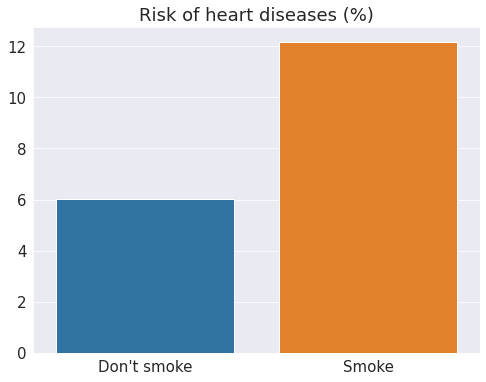

In [48]:
heart_smoking_mean = heart.groupby('Smoking')[['HeartDiseaseNum']].mean()
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 6))
plt.title('Risk of heart diseases (%)')
ax = sns.barplot(x = heart_smoking_mean.index.map({'Yes' : 'Smoke', 'No': "Don't smoke"}), y = heart_smoking_mean.HeartDiseaseNum*100)
ax.set(xlabel='', ylabel='');

Smokers have heart disease twise as often than non-smokers

**Risk of heart diseases for people who drink and don't drink alcohol(%)**

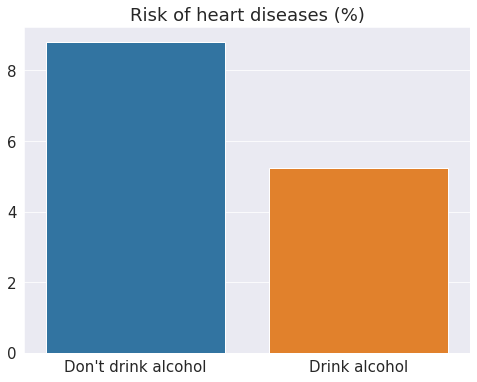

In [49]:
heart_AlcoholDrinking_mean = heart.groupby('AlcoholDrinking')[['HeartDiseaseNum']].mean()
plt.figure(figsize=(8, 6))
plt.title('Risk of heart diseases (%)')
ax = sns.barplot(x = heart_AlcoholDrinking_mean.index.map({'Yes' : 'Drink alcohol', 'No': "Don't drink alcohol"}), y = heart_AlcoholDrinking_mean.HeartDiseaseNum*100)
ax.set(xlabel='', ylabel='');

It's a medical fact that drinking small values of alcohol is good for your heart health(for example vine with food), but strong alcoholism increases risk of heart diseases(for example drinking a bottle of Vodka every day). So binary answer system don't show the full picture of a problem. We don't know what do this peopople drink.

**Risk of heart diseases for people who had a stoke and don't had a stroke (%)**

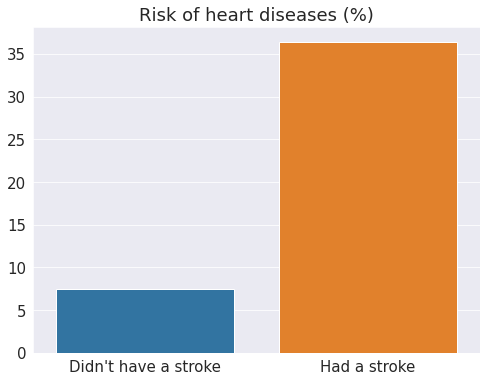

In [50]:
heart_Stroke_mean = heart.groupby('Stroke')[['HeartDiseaseNum']].mean()
plt.figure(figsize=(8, 6))
plt.title('Risk of heart diseases (%)')
ax = sns.barplot(x = heart_Stroke_mean.index.map({'Yes' : 'Had a stroke', 'No': "Didn't have a stroke"}), y = heart_Stroke_mean.HeartDiseaseNum*100)
ax.set(xlabel='', ylabel='');

**Distribution of people by Physical Health**

In [51]:
heart_disease = heart.where(heart.HeartDisease == 'Yes').groupby('PhysicalHealth')[['HeartDisease']].count()/27373
heart_nodisease = heart.where(heart.HeartDisease == 'No').groupby('PhysicalHealth')[['HeartDisease']].count()/292422
heart_all = heart.groupby('PhysicalHealth')[['HeartDisease']].count()/319795

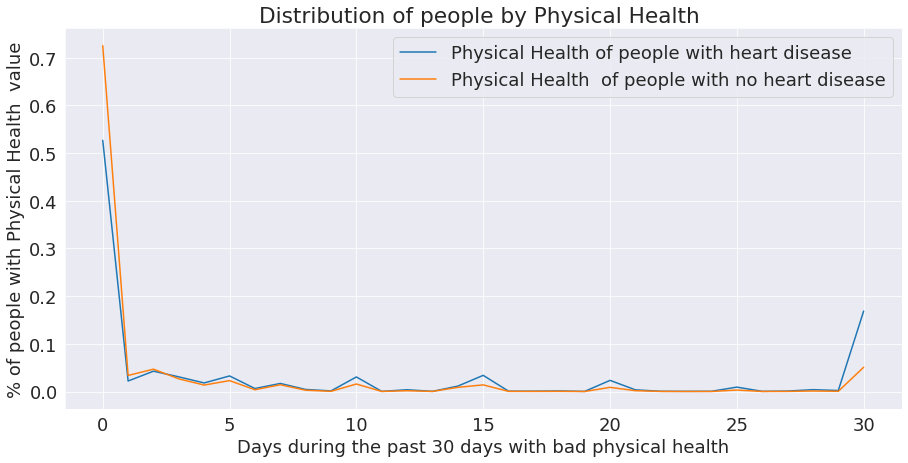

In [52]:
plt.figure(figsize=(15, 7))
plt.rcParams.update({'font.size': 18})
plt.title('Distribution of people by Physical Health ')
plt.plot(heart_disease.index, heart_disease.HeartDisease)
plt.plot(heart_nodisease.index, heart_nodisease.HeartDisease)
plt.xlabel('Days during the past 30 days with bad physical health')
plt.ylabel('% of people with Physical Health  value')
plt.legend(['Physical Health of people with heart disease', 'Physical Health  of people with no heart disease']);

**Distribution of people by Mental Health**

In [53]:
heart_disease = heart.where(heart.HeartDisease == 'Yes').groupby('MentalHealth')[['HeartDisease']].count()/27373
heart_nodisease = heart.where(heart.HeartDisease == 'No').groupby('MentalHealth')[['HeartDisease']].count()/292422
heart_all = heart.groupby('MentalHealth')[['HeartDisease']].count()/319795

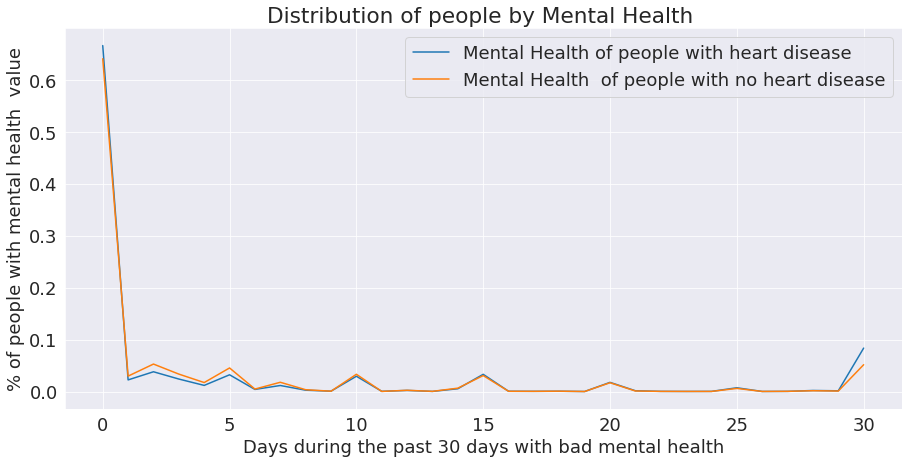

In [54]:
plt.figure(figsize=(15, 7))
plt.rcParams.update({'font.size': 18})
plt.title('Distribution of people by Mental Health ')
plt.plot(heart_disease.index, heart_disease.HeartDisease)
plt.plot(heart_nodisease.index, heart_nodisease.HeartDisease)
plt.xlabel('Days during the past 30 days with bad mental health')
plt.ylabel('% of people with mental health  value')
plt.legend(['Mental Health of people with heart disease', 'Mental Health  of people with no heart disease']);

**Risk of heart diseases for people who have serious difficulty walking or climbing stairs(%)**

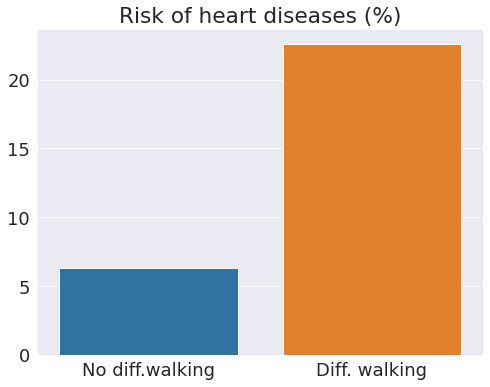

In [55]:
heart_DiffWalking_mean = heart.groupby('DiffWalking')[['HeartDiseaseNum']].mean()
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 18})
plt.title('Risk of heart diseases (%)')
ax = sns.barplot(x = heart_DiffWalking_mean.index.map({'Yes' : 'Diff. walking', 'No': "No diff.walking"}), y = heart_DiffWalking_mean.HeartDiseaseNum*100)
ax.set(xlabel='', ylabel='');

**Risk of heart diseases for Male and Female(%)**

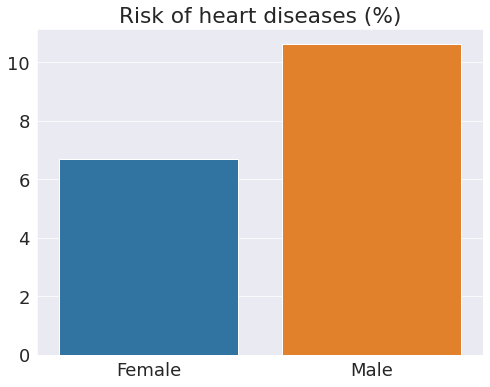

In [56]:
heart_sex_mean = heart.groupby('Sex')[['HeartDiseaseNum']].mean()
plt.figure(figsize=(8, 6))
plt.title('Risk of heart diseases (%)')
ax = sns.barplot(x = heart_sex_mean.index, y = heart_sex_mean.HeartDiseaseNum*100)
ax.set(xlabel='', ylabel='');

**Distribution of risk of heart diseases for people of different age groups(%)**

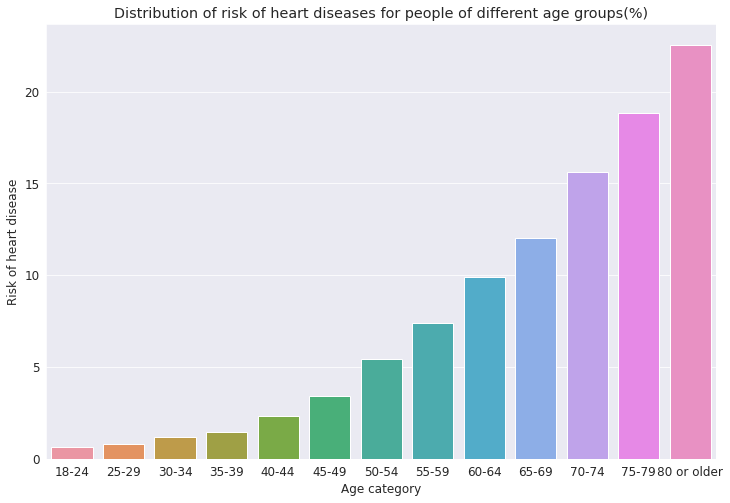

In [57]:
heart_AgeCategory_mean = heart.groupby('AgeCategory')[['HeartDiseaseNum']].mean()
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 12})
plt.title('Distribution of risk of heart diseases for people of different age groups(%)')
ax = sns.barplot(y = heart_AgeCategory_mean.HeartDiseaseNum*100, x = heart_AgeCategory_mean.index)
ax.set(xlabel='Age category', ylabel='Risk of heart disease');

**Risk of heart diseases for different races**

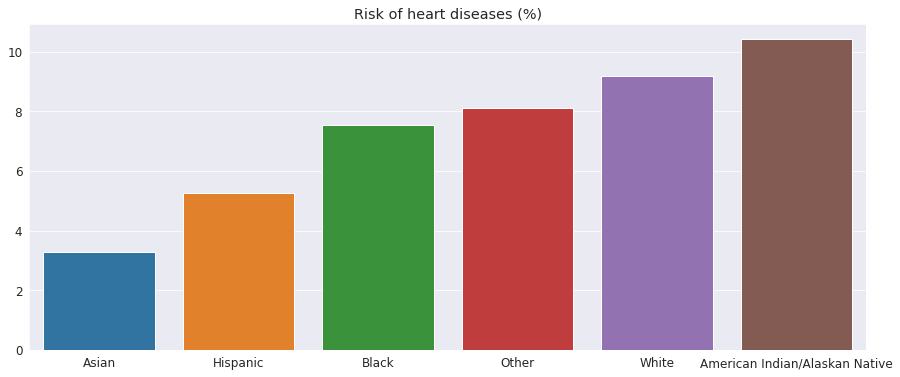

In [58]:
heart_race_mean = heart.groupby('Race')[['HeartDiseaseNum']].mean()
plt.figure(figsize=(15, 6))
plt.rcParams.update({'font.size': 12})
plt.title('Risk of heart diseases (%)')
ax = sns.barplot(x = heart_race_mean.index, y = heart_race_mean.HeartDiseaseNum*100,
                 order= heart_race_mean.sort_values('HeartDiseaseNum').index)
ax.set(xlabel='', ylabel='');

**Risk of heart diseases for different diabetes status**

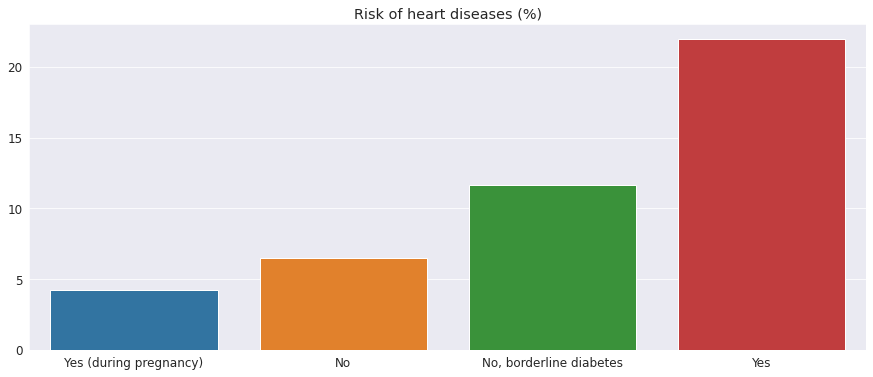

In [59]:
heart_diabetes_mean = heart.groupby('Diabetic')[['HeartDiseaseNum']].mean()
plt.figure(figsize=(15, 6))
plt.rcParams.update({'font.size': 12})
plt.title('Risk of heart diseases (%)')
ax = sns.barplot(x = heart_diabetes_mean.index, y = heart_diabetes_mean.HeartDiseaseNum*100,
                order= heart_diabetes_mean.sort_values('HeartDiseaseNum').index)
ax.set(xlabel='', ylabel='');

**Risk of heart diseases for people with different physical activity**

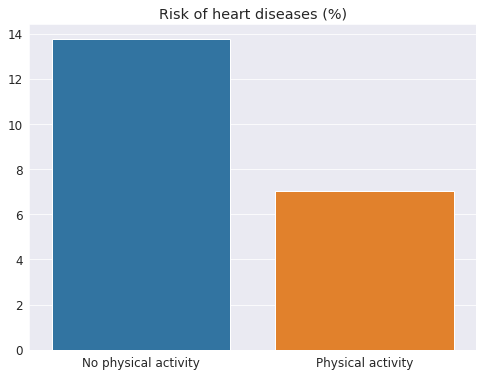

In [60]:
heart_PhysicalActivity_mean = heart.groupby('PhysicalActivity')[['HeartDiseaseNum']].mean()
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})
plt.title('Risk of heart diseases (%)')
ax = sns.barplot(x = heart_PhysicalActivity_mean.index.map({'Yes' : 'Physical activity', 'No': "No physical activity"}), y = heart_PhysicalActivity_mean.HeartDiseaseNum*100)
ax.set(xlabel='', ylabel='');

**Risk of heart diseases for people with different health rates**

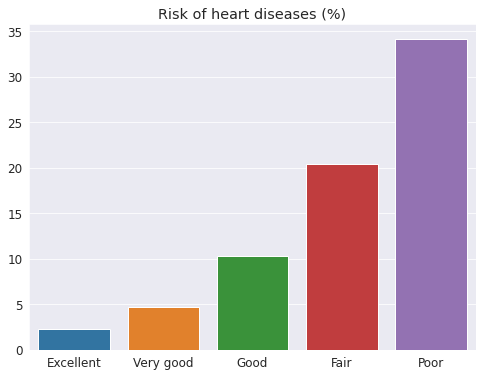

In [61]:
heart_rate_mean = heart.groupby('GenHealth')[['HeartDiseaseNum']].mean()
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})
plt.title('Risk of heart diseases (%)')
ax = sns.barplot(x = heart_rate_mean.index, y = heart_rate_mean.HeartDiseaseNum*100, 
                    order=heart_rate_mean.sort_values('HeartDiseaseNum').index)
ax.set(xlabel='', ylabel='');

**Risk of heart diseases for people with different sleep time**

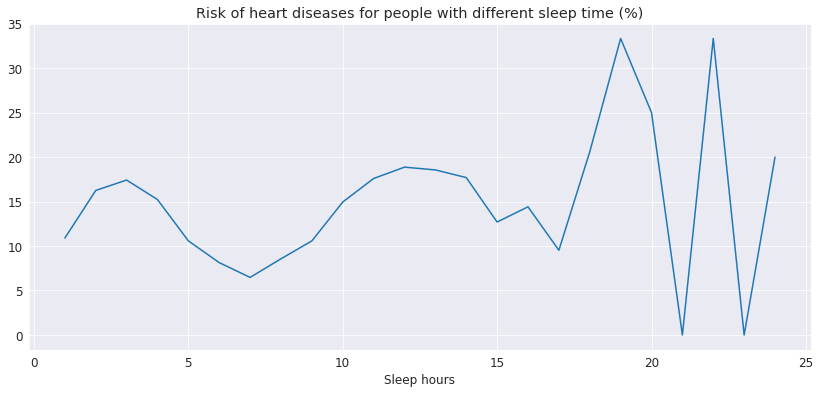

In [62]:
heart_sleep_mean = heart.groupby('SleepTime')[['HeartDiseaseNum']].mean()
plt.figure(figsize=(14, 6))
plt.rcParams.update({'font.size': 12})
plt.title('Risk of heart diseases for people with different sleep time (%)')
plt.plot(heart_sleep_mean.index, heart_sleep_mean.HeartDiseaseNum * 100)
plt.xlabel('Sleep hours')
plt.ylabel('');

Plot looks strange, maybe data is not representative. let' check where we have small data

In [63]:
heart_sleep_count = heart.groupby('SleepTime')[['HeartDiseaseNum']].count()
heart_sleep_count = heart_sleep_count[heart_sleep_count.HeartDiseaseNum < 1000]
list(heart_sleep_count.index)

[1.0,
 2.0,
 11.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0]

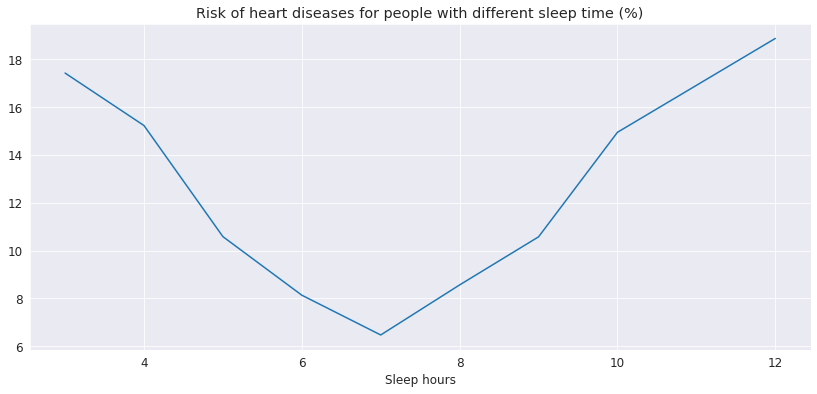

In [64]:
heart_sleep_mean = heart.groupby('SleepTime')[['HeartDiseaseNum']].mean()
heart_sleep_mean = heart_sleep_mean.drop(heart_sleep_count.index)
plt.figure(figsize=(14, 6))
plt.rcParams.update({'font.size': 12})
plt.title('Risk of heart diseases for people with different sleep time (%)')
plt.plot(heart_sleep_mean.index, heart_sleep_mean.HeartDiseaseNum * 100)
plt.xlabel('Sleep hours')
plt.ylabel('');

The most helthy is to sleep 6-8 hours

**Risk of heart diseases for people with asthma and no asthma**

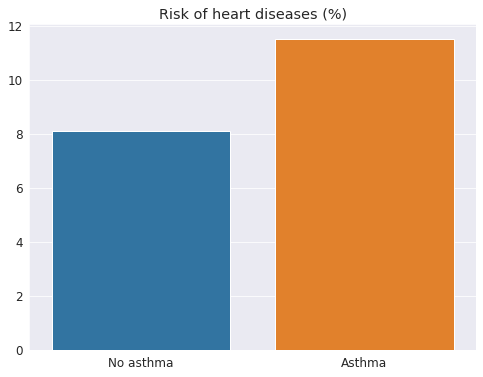

In [65]:
heart_asthma_mean = heart.groupby('Asthma')[['HeartDiseaseNum']].mean()
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})
plt.title('Risk of heart diseases (%)')
ax = sns.barplot(x = heart_asthma_mean.index.map({'Yes' : 'Asthma', 'No': "No asthma"}), y = heart_asthma_mean.HeartDiseaseNum*100)
ax.set(xlabel='', ylabel='');

**Risk of heart diseases for people with kidney disease and no kidney disease**

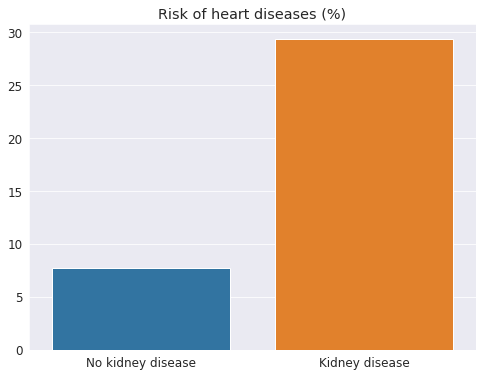

In [66]:
heart_KidneyDisease_mean = heart.groupby('KidneyDisease')[['HeartDiseaseNum']].mean()
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})
plt.title('Risk of heart diseases (%)')
ax = sns.barplot(x = heart_KidneyDisease_mean.index.map({'Yes' : 'Kidney disease', 'No': "No kidney disease"}), y = heart_KidneyDisease_mean.HeartDiseaseNum*100)
ax.set(xlabel='', ylabel='');

**Risk of heart diseases for people with skin cancer and no skin cancer**

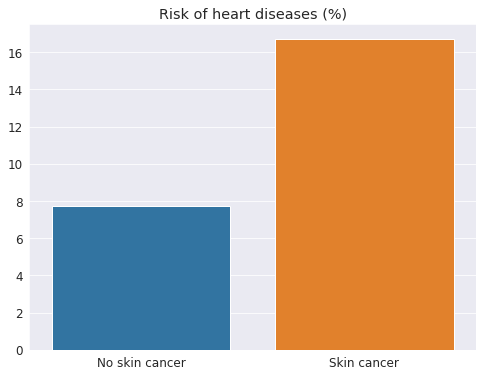

In [67]:
heart_SkinCancer_mean = heart.groupby('SkinCancer')[['HeartDiseaseNum']].mean()
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})
plt.title('Risk of heart diseases (%)')
ax = sns.barplot(x = heart_SkinCancer_mean.index.map({'Yes' : 'Skin cancer', 'No': "No skin cancer"}), y = heart_SkinCancer_mean.HeartDiseaseNum*100)
ax.set(xlabel='', ylabel='');

In [68]:
import prepdatamodel as pdm
col_bin = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
           'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
heart = pdm.binary(heart, col_bin)
heart = pdm.sex(heart, 'Sex')
heart = pdm.age(heart, 'AgeCategory')
heart = heart.drop(["HeartDiseaseNum"], axis = 1)

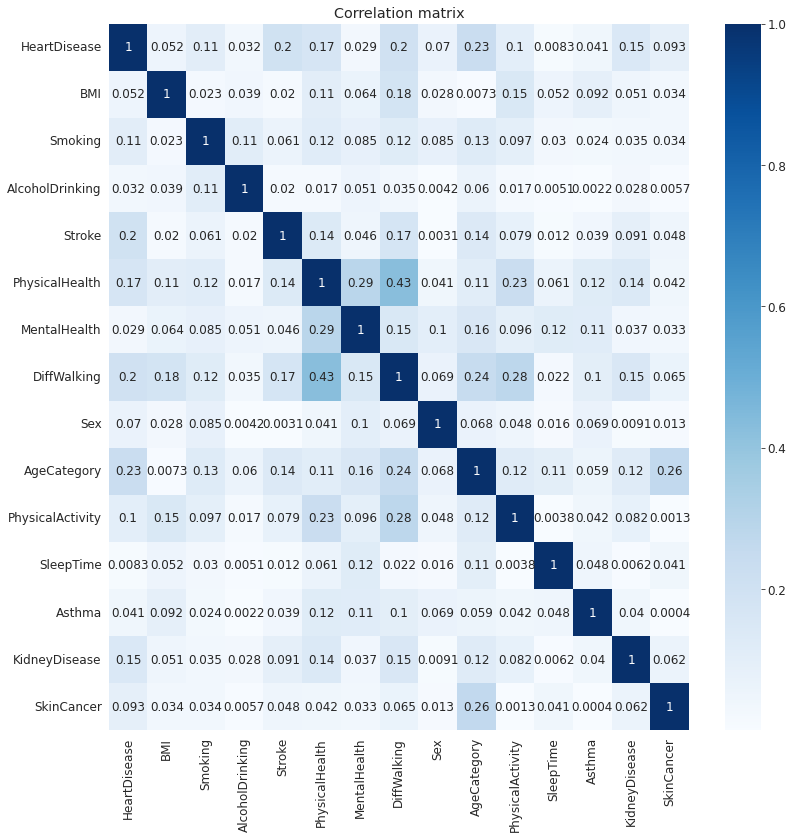

In [70]:
plt.figure(figsize=(13, 13))
plt.title('Correlation matrix')
sns.heatmap(abs(heart.corr()), annot = True, cmap ='Blues');